In [49]:
import numpy as np
from scipy import interpolate

## Setup for atmosphere Air and Stainless Steel ball

https://www.mathesongas.com/pdfs/flowchart/602%20(E300)/AIR%20602(E300)%20SS%200%20PSIG.pdf

In [50]:
pathto="C:/Users/andre/Documents/rotameter/"
ro,cal=np.loadtxt(pathto+'AIR_602(E300)_SS_0_PSIG.dat',unpack=True) # sccm
flowCal = interpolate.interp1d(ro, cal)

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,9)
x=np.linspace(5.0,150.0,200)

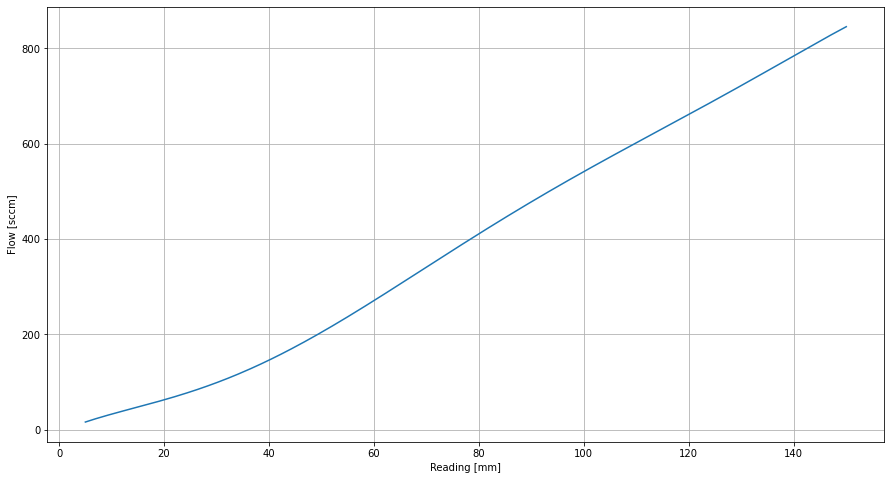

In [52]:
plt.plot(x, flowCal(x), label='air')
plt.xlabel('Reading [mm]')
plt.ylabel('Flow [sccm]')
plt.grid()
#plt.legend(loc='upper left')
plt.show()

## Calculate correction for different gas mixture

https://www.mathesongas.com/pdfs/flowchart/RotameterGasFactorChart.pdf

In [71]:
Ar_factor=0.851
CO2_factor=0.808

In [72]:
q_frac=0.3
mix_factor=((1.0-q_frac)*Ar_factor)+(q_frac*CO2_factor)
print(f'mix factor: {mix_factor:.5f}')

mix factor: 0.83810


## Readout of the SS ball

Take the reading from the middle of the ball

In [73]:
inSS=101.5
outSS=66.5

Determine input flow

In [74]:
inFlow=flowCal(inSS)
print(f'Air inflow {inFlow:.3f} sccm')
inFlow*=mix_factor
print(f'Gas Mixture inflow {inFlow:.3f} sccm')

Air inflow 550.710 sccm
Gas Mixture inflow 461.550 sccm


Determine output flow

In [75]:
outFlow=flowCal(outSS)
print(f'Air outflow {outFlow:.3f} sccm')
outFlow*=mix_factor
print(f'Gas Mixture outflow {outFlow:.3f} sccm')

Air outflow 316.425 sccm
Gas Mixture outflow 265.196 sccm


Determine return fraction

In [76]:
print(f'Return fraction {outFlow/inFlow*100.0:.1f}%')

Return fraction 57.5%


## Determe the flow prior to mixing

In [79]:
co2SS=41
inCO2Flow=flowCal(co2SS)*CO2_factor
print(f'CO2 inflow {inCO2Flow:.3f} sccm')

CO2 inflow 122.396 sccm


In [80]:
ar2SS=89
inArFlow=flowCal(ar2SS)*Ar_factor
print(f'Ar inflow {inArFlow:.3f} sccm')

Ar inflow 401.340 sccm


In [81]:
totFlow=inCO2Flow+inArFlow
print(f'Total input Flow {totFlow:.5f} sccm')
co2frac=inCO2Flow/totFlow
print(f'CO2 fraction {co2frac*100:.1f}%')

Total input Flow 523.73595 sccm
CO2 fraction 23.4%
